In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from itertools import combinations 

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
data = os.path.join('datasets', 'roe_cof.csv')

df = pd.read_csv(data, parse_dates=[0], index_col=0, squeeze=True).dropna()


df.head(-1)

,ucb_roe,ucb_cof,fin_pe,fin_pb,loan_gth,asset_yld,rrr
2008-03-01,11.08000,3.12000,14.692117,1.784067,4.447821,7.37000,5.00
2008-06-01,10.59000,2.99000,12.801276,1.468649,16.208615,7.11000,5.25
2008-09-01,9.40000,3.03000,13.514477,1.603242,14.716742,7.27000,6.00
2008-12-01,7.17000,3.01000,15.569823,1.340741,12.149364,7.23000,5.50
2009-03-01,7.26000,3.03000,15.236230,1.236850,14.135784,7.56000,4.75
2009-06-01,8.65000,2.85000,19.284649,1.592710,6.770386,7.40000,4.25
2009-09-01,9.99000,2.72000,21.240830,1.882077,6.453792,7.24000,4.00
2009-12-01,11.38000,2.37000,20.324328,1.924171,8.652602,6.55000,4.00
2010-03-01,11.90000,2.25000,19.329883,1.911234,2.422627,6.55000,4.00
2010-06-01,11.77000,2.18000,19.397814,2.028665,6.179292,6.40000,4.00


C:\Users\Derrick\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


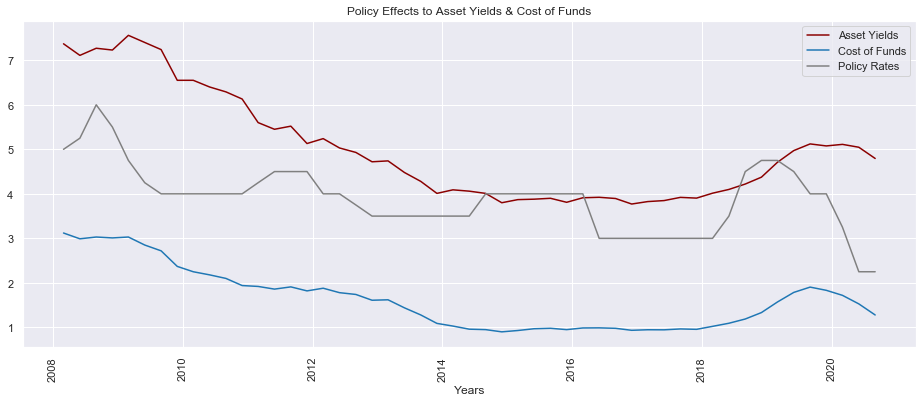

In [3]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(16,6))

plt.plot(df.asset_yld, color='darkred', label='Asset Yields')
plt.plot(df.ucb_cof, color='tab:blue', label='Cost of Funds')
plt.plot(df.rrr, color='gray', label='Policy Rates')
plt.title('Policy Effects to Asset Yields & Cost of Funds')
plt.legend()
plt.xlabel('Years')

plt.xticks(rotation=90)

plt.show()

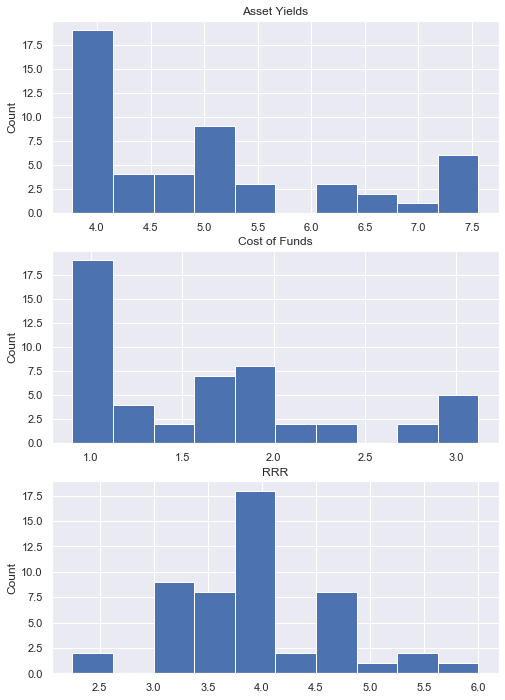

In [4]:
def all_dist():
    fig = plt.figure(figsize=(8,12))

    plt.subplot(3,1,1)
    plt.hist(df.asset_yld)
    plt.title('Asset Yields')
    plt.ylabel('Count')

    plt.subplot(3,1,2)
    plt.hist(df.ucb_cof)
    plt.title('Cost of Funds')
    plt.ylabel('Count')

    plt.subplot(3, 1, 3)
    plt.hist(df.rrr)
    plt.title('RRR')
    plt.ylabel('Count')

    
all_dist()

In [5]:
#testing for stationarity
def adf_test(series, name=None, num=None):
    result = adfuller(series)
    if name == None:
        name = str(series.name)
    if num != None:
        name = 'Series %s' % str(num)
    print('\n%s:' %name)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

cof = df.ucb_cof
yld = df.asset_yld
policy = df.rrr

adf_test(cof)
print('Sample size: %s' %len(cof))
adf_test(yld)
print('Sample size: %s' %len(yld))
adf_test(policy)
print('Sample size: %s' %len(policy))



ucb_cof:
ADF Statistic: -2.345688
p-value: 0.157656
Sample size: 51

asset_yld:
ADF Statistic: -2.159321
p-value: 0.221339
Sample size: 51

rrr:
ADF Statistic: -2.515455
p-value: 0.111759
Sample size: 51


### Stationarize

In [6]:
# The following code consolidates transofrmation steps into one
def normalize(series):
    ave, stdev = series.mean(), series.std()
    series = (series-ave)/stdev
    return series

def annual_vol(series):
    stdevs = series.groupby(series.index.year).std()
    return series.index.map(lambda d: stdevs.loc[d.year])

def variance_correct(series):
    return series/annual_vol(series)

def qtr_mean(series):
    means = series.groupby(series.index.month).mean()
    return series.index.map(lambda d: means.loc[d.month])

def seasonality_correct(series):
    return series - qtr_mean(series)

def make_stationary(*data, plot=False, headers=True):
    stdata = []
    for d in data:
        if headers == True:
            header = d.name
        d = normalize(d)
        d = d.diff().fillna(method="bfill")
        d = variance_correct(d)
        d = seasonality_correct(d).fillna(method="bfill")
        d.name = header
        stdata.append(d)
        plt.plot(d)
    if len(stdata) == 1:
        return stdata[0]
    else:
        return stdata
    

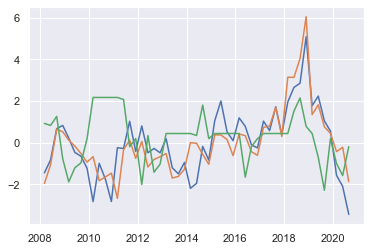


ucb_cof:
ADF Statistic: -9.254493
p-value: 0.000000
Sample size: 50

asset_yld:
ADF Statistic: -9.182520
p-value: 0.000000
Sample size: 50

rrr:
ADF Statistic: -9.134833
p-value: 0.000000
Sample size: 50


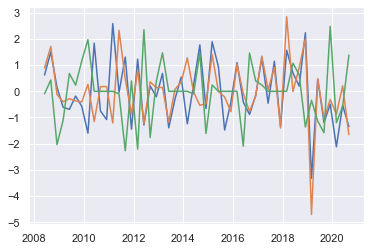

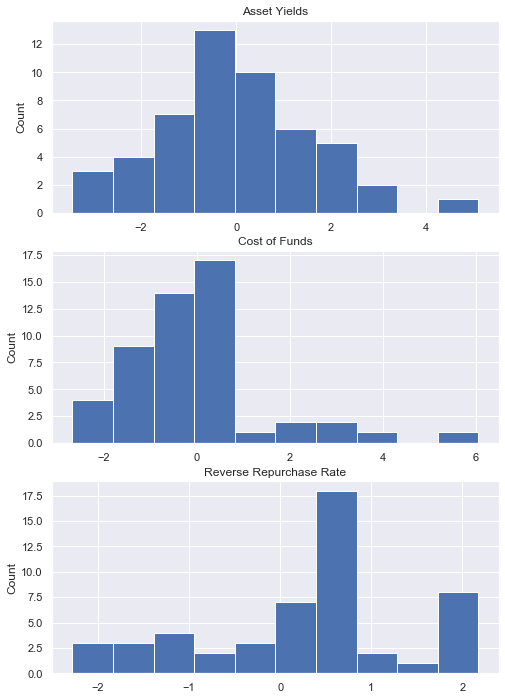

In [7]:
series = [cof, yld, policy]
nseries = [make_stationary(x) for x in series]
nseries2 = []

plt.show()


'''for s in series:
    header = s.name
    s = normalize(s)
    s = s.diff().fillna(method="bfill")
    s = variance_correct(s).fillna(method="bfill")
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    s.name = header
    nseries.append(s)
    adf_test(s)
    print('Sample size: %s' %len(s)) '''


for s in nseries:
    s = s.diff().dropna()
    adf_test(s)
    print('Sample size: %s' %len(s))
    plt.plot(s)
    nseries2.append(s)

plt.show()
    
fig = plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
plt.hist(nseries[0])
plt.title('Asset Yields')
plt.ylabel('Count')

plt.subplot(3,1,2)
plt.hist(nseries[1])
plt.title('Cost of Funds')
plt.ylabel('Count')

plt.subplot(3,1,3)
plt.hist(nseries[2])
plt.title('Reverse Repurchase Rate')
plt.ylabel('Count')

plt.show()

sdf = pd.concat(nseries, axis=1).fillna(method="ffill")
sdf2 = pd.concat(nseries2, axis=1).fillna(method="ffill")

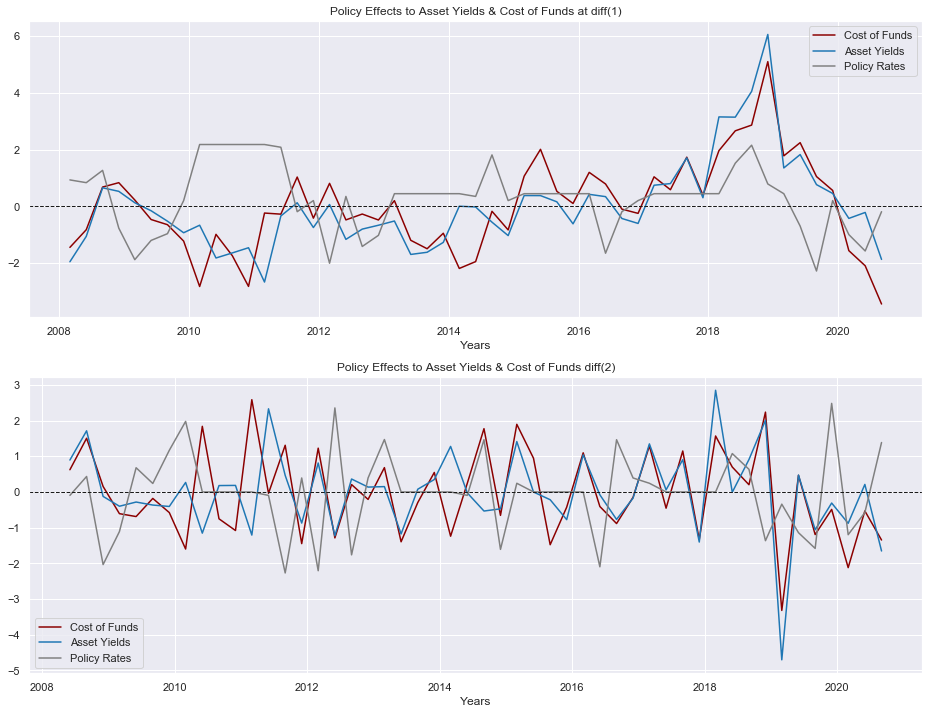

In [8]:
sns.set(style="darkgrid")

fig = plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.plot(sdf.ucb_cof, color='darkred', label='Cost of Funds')
plt.plot(sdf.asset_yld, color='tab:blue', label='Asset Yields')
plt.plot(sdf.rrr, color='gray', label='Policy Rates')
plt.title('Policy Effects to Asset Yields & Cost of Funds at diff(1)')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.subplot(2,1,2)
plt.plot(sdf2.ucb_cof, color='darkred', label='Cost of Funds')
plt.plot(sdf2.asset_yld, color='tab:blue', label='Asset Yields')
plt.plot(sdf2.rrr, color='gray', label='Policy Rates')
plt.title('Policy Effects to Asset Yields & Cost of Funds diff(2)')
plt.legend()
plt.xlabel('Years')
plt.axhline(linewidth=1, linestyle='dashed', color='k')

plt.show()

### Testing Causality

In [9]:
def granger(s1, s2, lag=4):
    granger_df = pd.concat([s1, s2], axis=1).dropna()
    grangercausalitytests(granger_df, lag)

print('Testing causality\n')
print('policy -> cof (diff1)')
granger(sdf.ucb_cof,sdf.rrr)
print('----------------------------\n')
print('policy -> asset yields (diff1)')
granger(sdf.asset_yld,sdf.rrr)
print('----------------------------\n')
print('----------------------------\n')
print('policy -> cof (diff2)')
granger(sdf2.ucb_cof,sdf.rrr)
print('----------------------------\n')
print('policy -> asset yields (diff2)')
granger(sdf2.asset_yld,sdf.rrr)


Testing causality

policy -> cof (diff1)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.8305  , p=0.0197  , df_denom=47, df_num=1
ssr based chi2 test:   chi2=6.2026  , p=0.0128  , df=1
likelihood ratio test: chi2=5.8470  , p=0.0156  , df=1
parameter F test:         F=5.8305  , p=0.0197  , df_denom=47, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.6697  , p=0.0145  , df_denom=44, df_num=2
ssr based chi2 test:   chi2=10.4006 , p=0.0055  , df=2
likelihood ratio test: chi2=9.4317  , p=0.0090  , df=2
parameter F test:         F=4.6697  , p=0.0145  , df_denom=44, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5768  , p=0.0668  , df_denom=41, df_num=3
ssr based chi2 test:   chi2=9.0501  , p=0.0286  , df=3
likelihood ratio test: chi2=8.2910  , p=0.0404  , df=3
parameter F test:         F=2.5768  , p=0.0668  , df_denom=41, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F t

### Fitting VAR Model

In [10]:
### AUTOMATE MODEL SELECTION
def fit_tsmodel(data, model='VAR', lags=4):
    models = ['VAR','SARIMAX']

    if model in models:
        if model == models[0]:
            model = VAR
        elif model == models[1]:
            model == SARIMAX
    else:
        print('Model not supported')
        return None
    
    fmodel = model(data)          
    res = fmodel.fit(maxlags=lags)
    return res

In [11]:
def create_df(*series):
    df = pd.concat(series, axis=1).dropna()
    n = []
    for i in series:
        n.append(i.name)
    df.columns = n
    return df

rrr_yld_1 = sdf.drop('ucb_cof', axis=1)
rrr_yld_2 = sdf2.drop('ucb_cof', axis=1)
rrr_cof_1 = sdf.drop('asset_yld', axis=1)
rrr_cof_2 = sdf2.drop('asset_yld', axis=1)


In [12]:
# RRR to Asset Yields Model at Diff 1
res1 = fit_tsmodel(rrr_yld_1,lags=4)
res1.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     08:07:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.11681
Nobs:                     47.0000    HQIC:                  0.674884
Log likelihood:          -124.974    FPE:                    1.51865
AIC:                     0.408246    Det(Omega_mle):         1.06974
--------------------------------------------------------------------
Results for equation asset_yld
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.099634         0.177946           -0.560           0.576
L1.asset_yld         0.545094         0.163506            3.334           0.001
L1.rrr               0.234941         0.177769            1.

In [13]:
print(r2_score(res1.fittedvalues['asset_yld']+res1.resid['asset_yld'],
  res1.fittedvalues['asset_yld']))

0.580444266712026


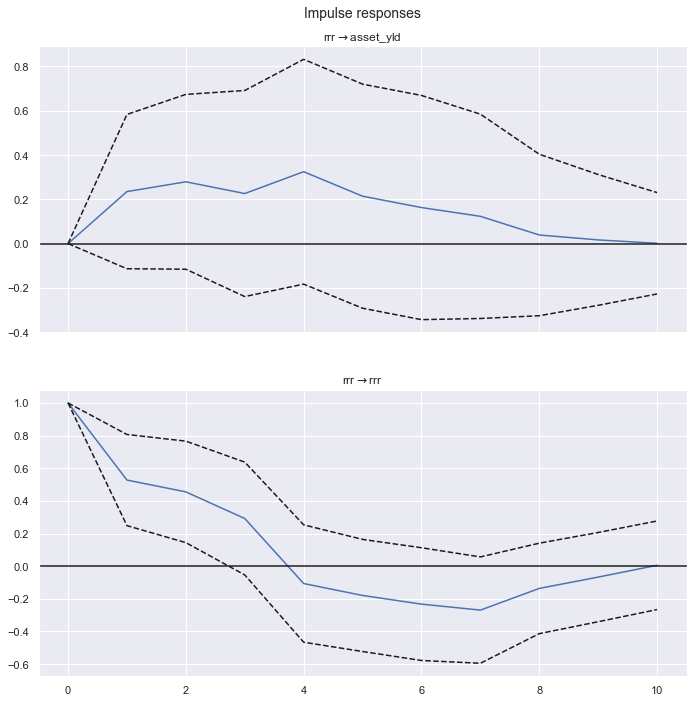

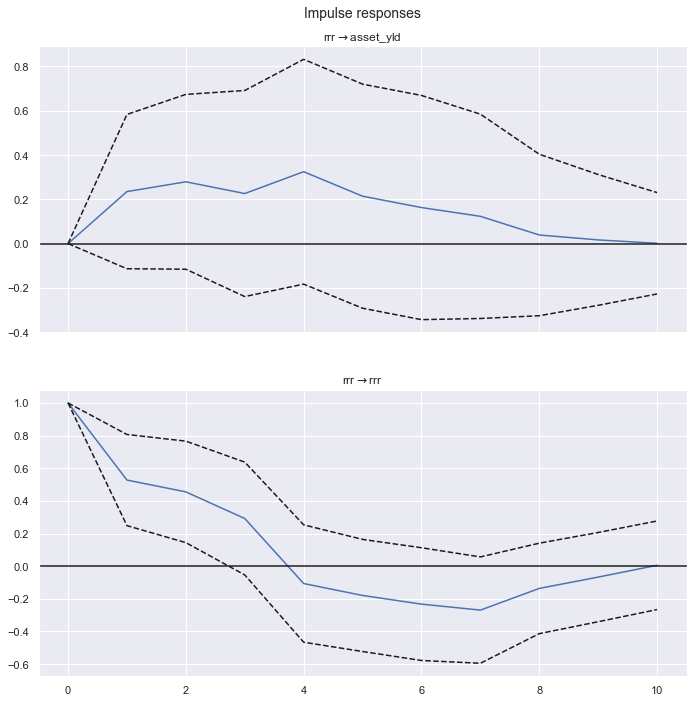

In [14]:
irf = res1.irf(10)
irf.plot(orth=False, impulse='rrr')

***Note: The y-axis is given in standard deviations and x-axis in lag-periods.***

In [15]:
# RRR to Asset Yields Model at Diff 2
res2 = fit_tsmodel(rrr_yld_2,lags=4)
res2.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     08:07:24
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.49249
Nobs:                     46.0000    HQIC:                   1.04499
Log likelihood:          -130.412    FPE:                    2.19714
AIC:                     0.776937    Det(Omega_mle):         1.53691
--------------------------------------------------------------------
Results for equation asset_yld
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               -0.034972         0.179975           -0.194           0.846
L1.asset_yld        -0.354166         0.167308           -2.117           0.034
L1.rrr               0.152416         0.191086            0.

In [16]:
print(r2_score(res2.fittedvalues['asset_yld']+res2.resid['asset_yld'],
  res2.fittedvalues['asset_yld']))

0.157413640129748


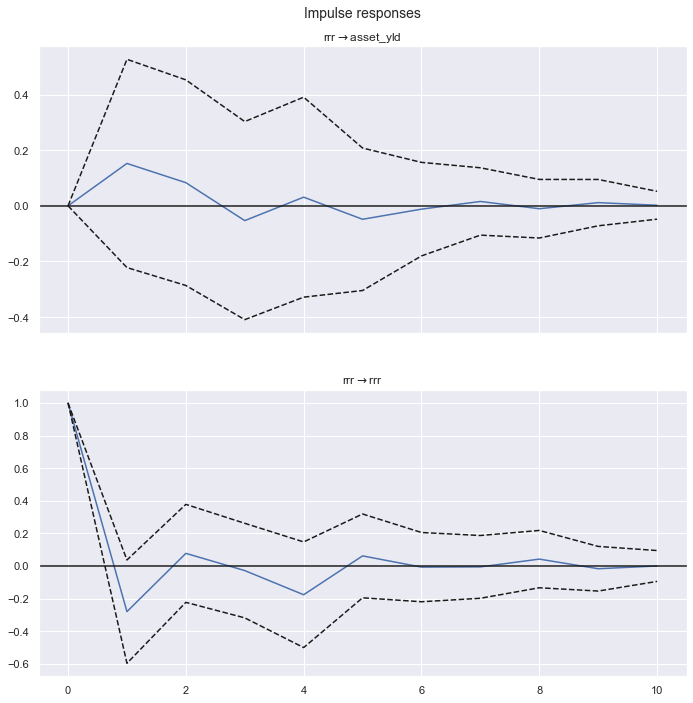

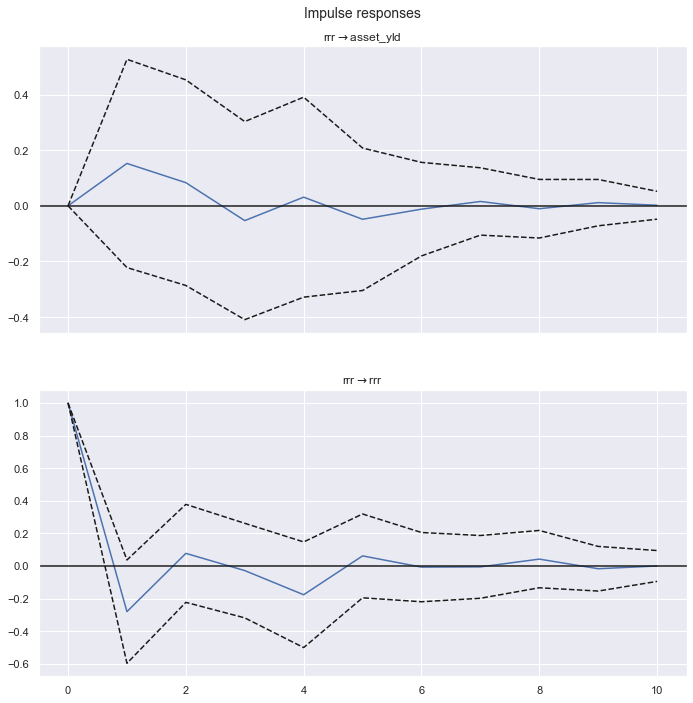

In [17]:
irf = res2.irf(10)
irf.plot(orth=False, impulse='rrr')

In [18]:
# RRR to COF Model at Diff 1
res3 = fit_tsmodel(rrr_cof_1,lags=4)
res3.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     08:07:26
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.18415
Nobs:                     47.0000    HQIC:                  0.742221
Log likelihood:          -126.556    FPE:                    1.62443
AIC:                     0.475583    Det(Omega_mle):         1.14425
--------------------------------------------------------------------
Results for equation ucb_cof
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.230334         0.183581           -1.255           0.210
L1.ucb_cof         0.477188         0.161088            2.962           0.003
L1.rrr             0.353500         0.175797            2.011         

In [19]:
print(r2_score(res3.fittedvalues['ucb_cof']+res3.resid['ucb_cof'],
  res3.fittedvalues['ucb_cof']))

0.6145600746149222


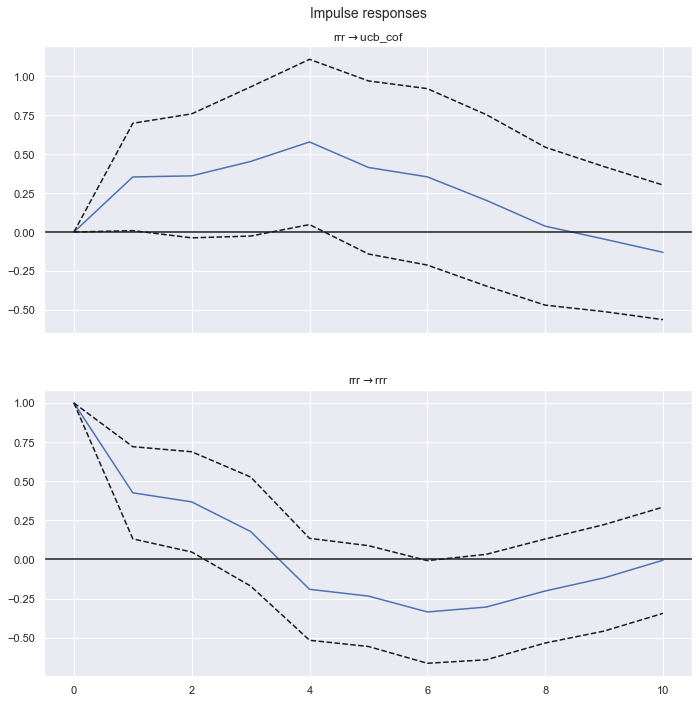

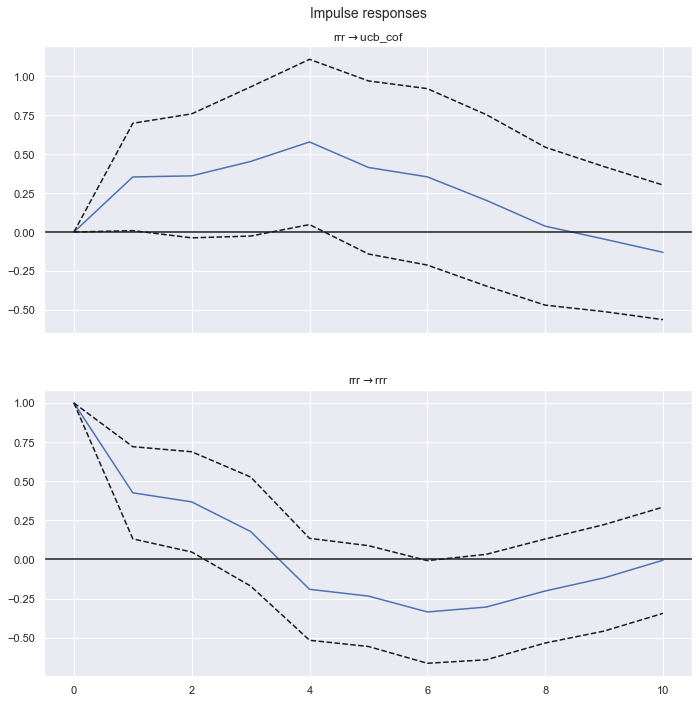

In [20]:
irf = res3.irf(10)
irf.plot(orth=False, impulse='rrr')

In [21]:
# RRR to COF Model at Diff 2
res4 = fit_tsmodel(rrr_cof_2,lags=4)
res4.summary()

C:\Users\Derrick\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  % freq, ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     08:07:28
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    1.57713
Nobs:                     46.0000    HQIC:                   1.12963
Log likelihood:          -132.359    FPE:                    2.39120
AIC:                     0.861575    Det(Omega_mle):         1.67266
--------------------------------------------------------------------
Results for equation ucb_cof
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.086880         0.180001           -0.483           0.629
L1.ucb_cof        -0.378987         0.161534           -2.346           0.019
L1.rrr             0.279249         0.179731            1.554         

In [22]:
print(r2_score(res4.fittedvalues['ucb_cof']+res4.resid['ucb_cof'],
  res4.fittedvalues['ucb_cof']))

0.2386856319427223


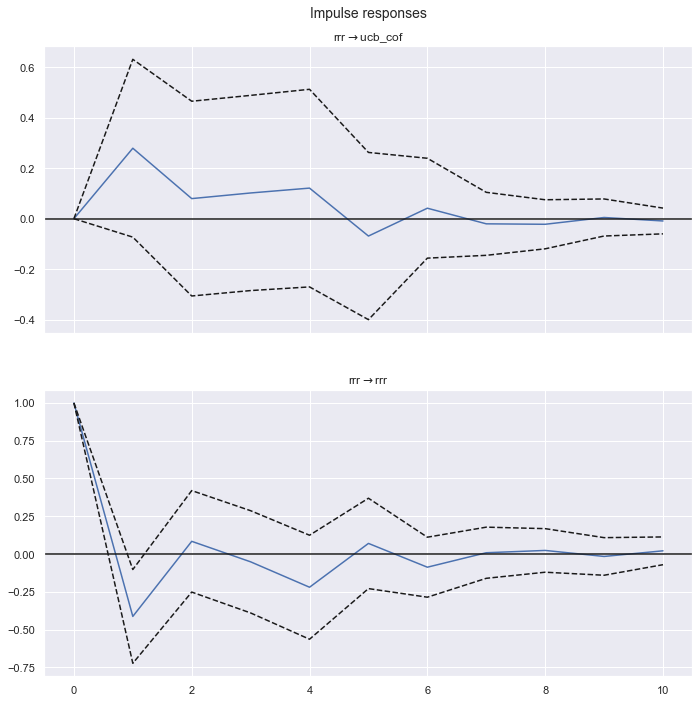

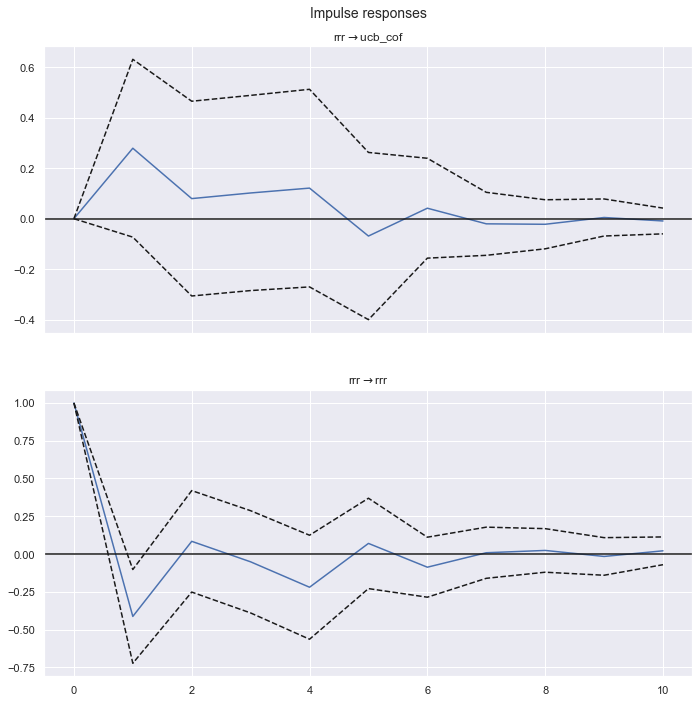

In [23]:
irf = res4.irf(10)
irf.plot(orth=False, impulse='rrr', response='ucb_cof')

### Summary